<a href="https://colab.research.google.com/github/yoohyunseok/Machine-Learnig-Deep-Learning/blob/main/6_1Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과일 사진 데이터 준비하기
- 데이터는 사과, 바나나, 파인 애플을 담고있는 흑백사진

In [6]:

!wget https://bit.ly/fruits_300_data -O fruits_300.npy
#코렙의 코드 셀에서 !로 시작하면 리눅스 셸 명령어
# wget: 원격 주소에서 데이터를 다운로드하여 저장
# -O 옵션: 저장할 파일 이름 지정(대문자 O임)

--2026-02-26 14:26:00--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2026-02-26 14:26:00--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2026-02-26 14:26:01--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
fruits = np.load('fruits_300.npy') #load() => npy 파일 로드
# fruits는 넘파이 배열이고 fruits_300.npy 파일에 들어있는 모든 데이터를 담고 있다.

In [9]:
print(fruits.shape) #3차원 배열
#(샘플 개수, 이미지 높이, 이미지 너비)

(300, 100, 100)


In [10]:
print(fruits[0, 0, :])#첫 번째 이미지의 첫 번째 행 출력

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


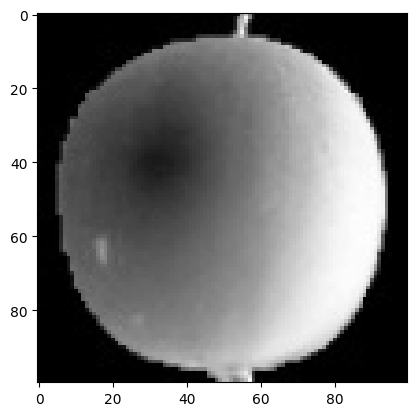

In [11]:
plt.imshow(fruits[0], cmap='gray')#imshow() => numpy 배열로 저장된 이미지 그리기
plt.show() #이 이미지의 첫 번째 행을 방금 출력함

**흑백 이라서 0~255까지의 정숫값을 가지고 숫자가 클수록 밝다**

흑백 사진이 반전되어 있는 이유
=> ***컴퓨터는 255에 가까운 픽셀에 집중***하기 때문에 흑백 사진을 반전 시켜서 컴퓨터가 사과에 집중하게 만듦

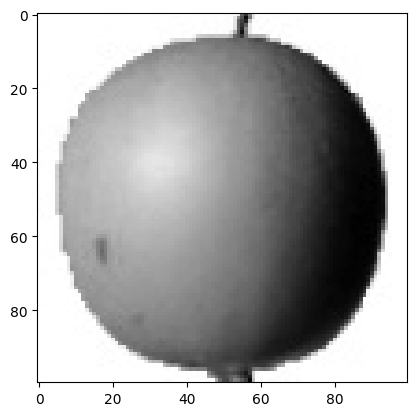

In [12]:
plt.imshow(fruits[0], cmap='gray_r') #cmap = 'gray_r' 다시 반전
plt.show()

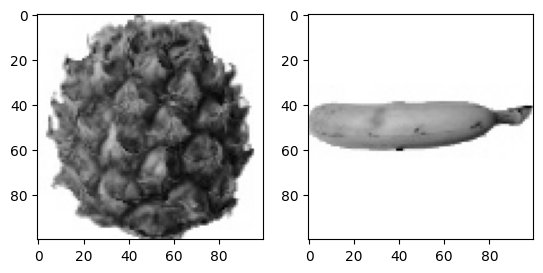

In [14]:
#파인애플, 바나나 이미지도 출력
fig, axs = plt.subplots(1, 2) #subplots() => 여러개의 그래프를 배열처럼 쌓을 수 있게 도와줌
#subplots(그래프를 쌓을 행, 열)
#저기 파인 애플이랑 바나나가 그려져 있는 하얀 x축, y축 네모를 subplots이 만들어주는거임.
# 1,2를 매개 변수로 받았으니깐 이렇게 1행 2열의 네모 박스를 만들어줌 이 네모 박스를 서브 그래프라고 부르는듯
#반환된 axs는 2개의 서브 그래프를 담고 있는 배열
axs[0].imshow(fruits[100], cmap='gray_r') #첫 번째 서브 그래프에 파인애플 그림
axs[1].imshow(fruits[200], cmap='gray_r') #두 번째 서브 그래프에 바나나 그림
plt.show()

In [15]:
#100 x 100 배열을 쭉 펼쳐서 길이가 10,000인 1차원 넘파이 배열로 만들기(계산의 편리함을 위해)
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [16]:
print(apple.shape)

(100, 10000)


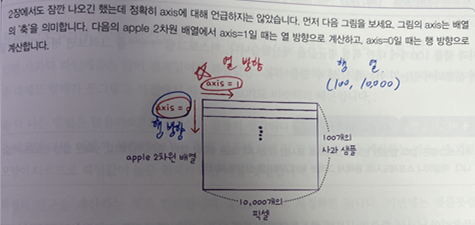

In [17]:
print(apple.mean(axis = 1)) #사과 샘플 100개에 대한 픽셀 평균 값 계산

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


# 히스토그램
- 값이 나타난 빈도를 그래프로 표시한 것
- x축이 구간, y축이 빈도
- 여기서는 픽셀의 평균값이 어떻게 분포되어 있는지 한눈에 확인하기 위해서 그림

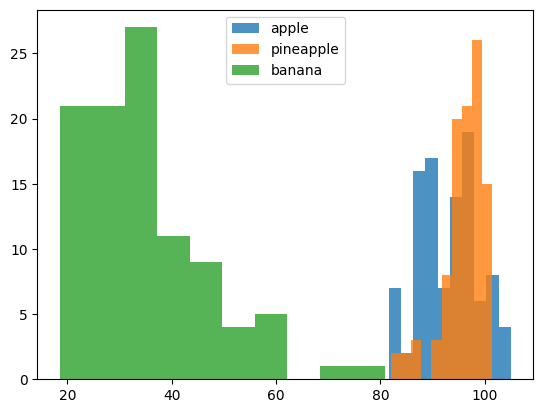

In [19]:
plt.hist(np.mean(apple, axis = 1), alpha = 0.8)
plt.hist(np.mean(pineapple, axis = 1), alpha = 0.8)
plt.hist(np.mean(banana, axis = 1), alpha = 0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

이걸로 잘 구별이 안돼,..**픽셀 별 평균값을 비교해 보면 어떨까? 전체 샘플에 대해 각 픽셀의 평균을 계산**

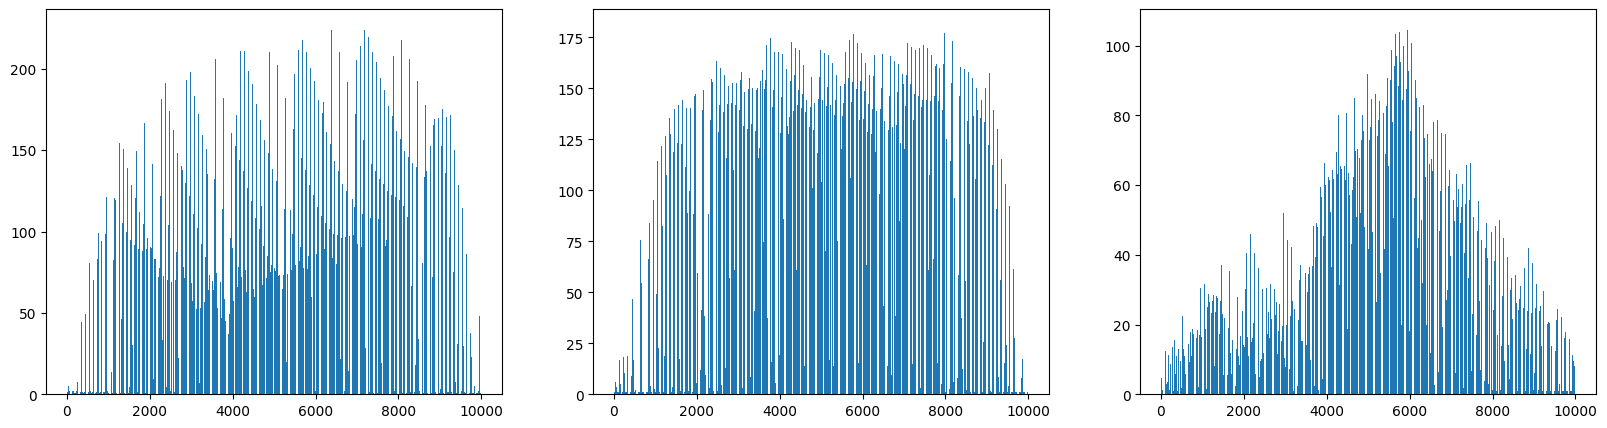

In [22]:
#axis = 0으로 지정, bar()으로 픽셀 10,000개에 대한 평균 값을 막대 그래프로 그림
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis = 0))
axs[1].bar(range(10000), np.mean(pineapple, axis = 0))
axs[2].bar(range(10000), np.mean(banana, axis = 0))
plt.show()

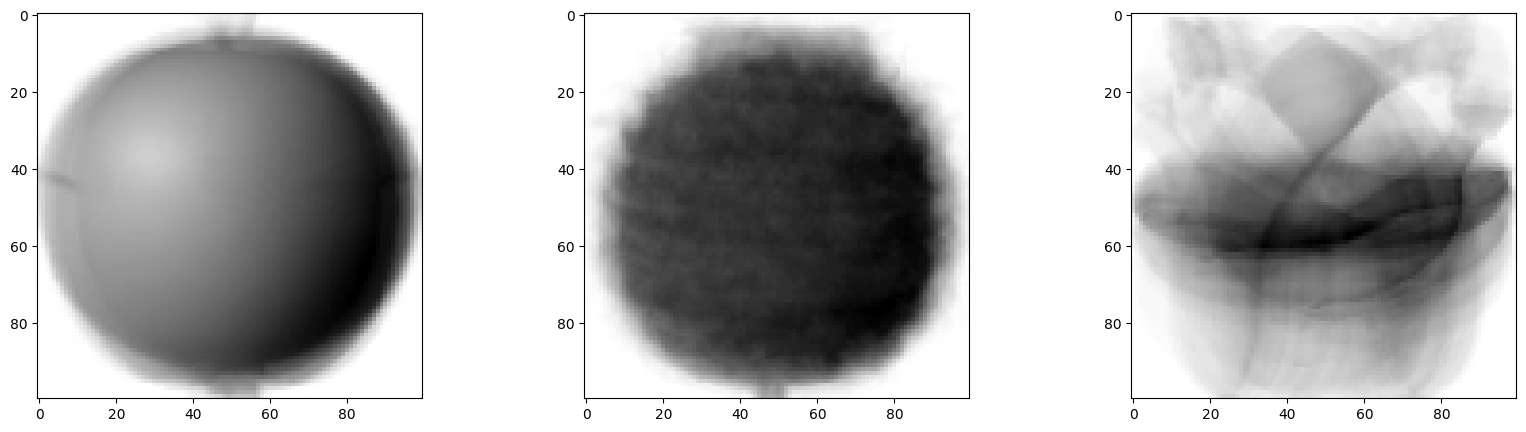

In [23]:
#픽셀의 평균 값을 100x100 크기로 바꿔서  이미지처럼 출력하여 위 그래프와 비교
apple_mean = np.mean(apple, axis = 0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis = 0).reshape(100, 100)
banana_mean = np.mean(banana, axis = 0).reshape(100, 100)
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

**평균 값과 가까운 사진 고르기**

In [24]:
#절댓값 오차 사용해서 평균 값과 가까운 사진 고르기
abs_diff = np.abs(fruits - apple_mean) #abs() => 절댓값 반환
abs_mean = np.mean(abs_diff, axis=(1, 2)) #abs_diff의 크기가 (300, 100, 100)인 배열이기 때문에 각 샘플에 대한 평균을 구하기 위해axis에 두 번째, 세 번째 차원을 모두 지정
print(abs_mean.shape)

(300,)


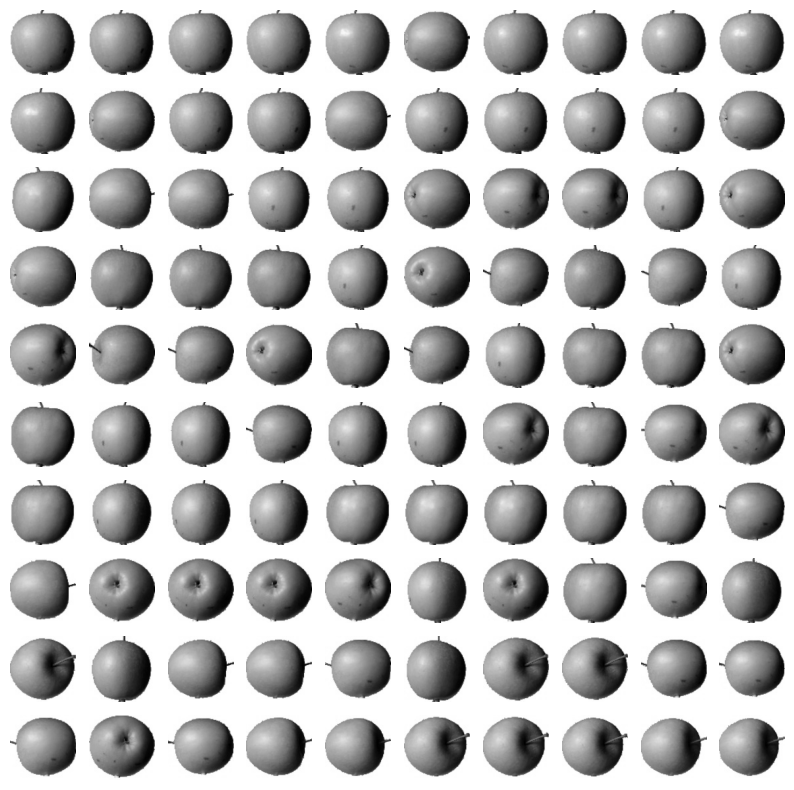

In [25]:
#값이 가장 작은 순서대로 100개 고르기
apple_index = np.argsort(abs_mean)[:100] #argsort() => 오름차순으로 나열한 abs_mean 배열의 인덱스 반환
#이 인데스 중 처음 100개를 선택해서 그래프를 그리기
fig, axs = plt.subplots(10, 10, figsize=(10, 10)) #figsize 매개 변수: 전체 그래프 크기 지정
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
    axs[i, j].axis('off') #이미지만 깔끔하게 출력하기 위해 좌표축 표시 X
plt.show()

# 군집(clustering)
- 비슷한 샘플 끼리 그룹으로 모으는 작업
- 대표적인 비지도 학습 작업 중 하나
- 군집 알고리즘에서 만든 그룹을 클러스터(cluster)라고 부름

**바나나 골라보기**

In [26]:
#절댓값 오차 사용해서 평균 값과 가까운 사진 고르기
abs_diff = np.abs(fruits - banana_mean) #abs() => 절댓값 반환
abs_mean = np.mean(abs_diff, axis=(1, 2)) #abs_diff의 크기가 (300, 100, 100)인 배열이기 때문에 각 샘플에 대한 평균을 구하기 위해axis에 두 번째, 세 번째 차원을 모두 지정
print(abs_mean.shape)

(300,)


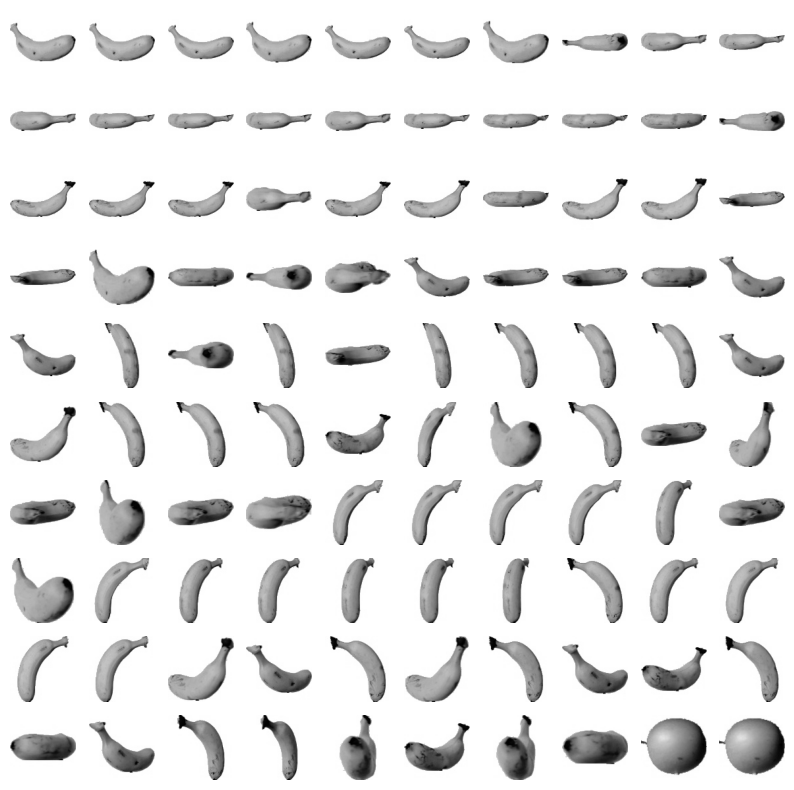

In [27]:
#값이 가장 작은 순서대로 100개 고르기
apple_index = np.argsort(abs_mean)[:100] #argsort() => 오름차순으로 나열한 abs_mean 배열의 인덱스 반환
#이 인데스 중 처음 100개를 선택해서 그래프를 그리기
fig, axs = plt.subplots(10, 10, figsize=(10, 10)) #figsize 매개 변수: 전체 그래프 크기 지정
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
    axs[i, j].axis('off') #이미지만 깔끔하게 출력하기 위해 좌표축 표시 X
plt.show()
#바나나 나머지 2개 어디간거야~~